# Let's Get That Data!

In [61]:
#First, The Imports
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

# Every returned Out[] is displayed, not just the last one. (Thanks NaRae!)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [62]:
# the key variables
consumerKey = "XXXXXXXXXXXXXX"
consumerSecret ="XXXXXXXXXXXXX"

In [63]:
#authentication
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)

#connecting to Twitter API
api = tweepy.API(auth)

In [64]:
# this is helpful for later but I need to read in the .csv files so I can append them later
#tcat = pd.read_csv(r'cat_tweets.csv')
#tdog = pd.read_csv(r'dog_tweets.csv')
filepath = "/Users/Margaret/Documents/Data_Science/Project_Margaret/"

In [40]:
#getting cat and dog search results
#NOTE: The dog neologisms I will compare: doggo and doge
#NOTE: The cat neologisms I will compare: kitteh and toebeans
rDog = api.search(q='%23dog')
rDogs = api.search(q='%23dogs')
rDoggo = api.search(q='%23doggo')
rDoge = api.search(q='%23doge')
rCat = api.search(q='%23cat')
rCats = api.search(q='%23cats')
rToeBeans = api.search(q='%23toebeans')
rKitteh = api.search(q='%23kitteh')

In [41]:
#Get the first 1000 items based on the search query
for tweet in tweepy.Cursor(api.search, q='%23dog').items(1000):
    rDog.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23doggo').items(1000):
    rDoggo.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23doge').items(1000):
    rDoge.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23cat').items(1000):
    rCat.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23toebeans').items(1000):
    rToeBeans.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23kitteh').items(1000):
    rKitteh.append(tweet)

In [42]:
#Adding in the plurals
for tweet in tweepy.Cursor(api.search, q='%23dogs').items(1000):
    rDogs.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23cats').items(1000):
    rCats.append(tweet)

In [43]:
#Verify the number of items returned
len(rDog)
len(rDogs)
len(rDoge)
len(rDoggo)
len(rCat)
len(rCats)
len(rToeBeans)
len(rKitteh)

1015

1015

1015

1015

1015

1015

77

145

### Even already it is interesting to see that ToeBeans and Kitteh are already returning a lot less results. This likely means that they are fairly unpopular terms (at least to tag your tweet with) which is interesting.  
  
### Below is an example of a tweet as well as some additional information about it. This is the only tweet I will show, in attempts to not go against the data-sharing agreement. However, this is what the data I'm working with looks like.

In [44]:
#this is an example of a tweet
tweet1 = rDog[1] #get the data of the first tweet.

#then, print tweet. 
print(tweet1.text)

#other additional info about the tweet for reference
tweet1.lang                    #the tweet is in English
tweet1.user.screen_name        #this is the username
tweet1.user.description        #since this matches the username it ins't a re-tweet
tweet1.created_at              #date and time tweet was created
tweet1.id                      #Tweet ID #
tweet1.favorite_count          #how many likes the tweet received (in this case 1)

The Scoop:Don't Miss These November 2017 Dog Events: As we gear up =&gt; https://t.co/N9Yr8LzeMy #dog https://t.co/ERF2rqk5ka


'en'

'DogDogMag'

'Dog DogMag #dog'

datetime.datetime(2017, 11, 2, 4, 59, 5)

925950367350784000

0

In [45]:
# this is a function found here: http://blog.impiyush.com/2015/03/data-analysis-using-twitter-api-and.html
# I am using this to clean my data into a dataframe
def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet 
    in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet 
    in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]


    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet 
    in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet 
    in tweets]

    return DataSet

In [89]:
#Do this funciton on the tweets, then connect the dataframes
dog_df = toDataFrame(rDog)
dogs_df = toDataFrame(rDogs)
doge_df = toDataFrame(rDoge)
doggo_df = toDataFrame(rDoggo)
cat_df = toDataFrame(rCat)
cats_df = toDataFrame(rCats)
toebeans_df = toDataFrame(rToeBeans)
kitteh_df = toDataFrame(rKitteh)

#Adding a column to say which hashtag it came from
dog_df['Hashtag'] = "dog"
dogs_df['Hashtag'] = "dogs" 
doge_df['Hashtag'] = "doge"
doggo_df['Hashtag'] = "doggo"
cat_df['Hashtag'] = "cat"
cats_df['Hashtag'] = "cats"
toebeans_df['Hashtag'] = "toebeans"
kitteh_df['Hashtag'] = "kitteh"

# now to combine into 2 larger ones, overall cat related, overall dog related
tcat_df = pd.concat([cat_df, cats_df, toebeans_df, kitteh_df])
tdog_df = pd.concat([dog_df, dogs_df, doge_df, doggo_df])

# NOTE: Still need to fogure out a good way to get rid of possible redundant tweets? 
#or maybe not? 
#I could potentially use that as a statistic? - which could be interesting. 
#either way, for now I'm going to leave it and make that decision a little later. 

In [90]:
#read in old csv files
tcat = pd.read_csv(filepath + 'cat_tweets.csv')
tdog = pd.read_csv(filepath + 'dog_tweets.csv', index_col=0)

In [91]:
#append the old and new csv
tcat_df.append(tcat, ignore_index=True)
tdog_df.append(tdog, ignore_index=True)

# Write out the DF as a new CSV file
tcat_df.to_csv('cat_tweets.csv')
tdog_df.to_csv('dog_tweets.csv')

## Let's attempt some analysis.  
- again not completely sure how much I can share, so for now I'm only going to use the most recently gathered data. 

In [92]:
# Trying a favorite vs. retweet comparison
cat_fav = tcat_df['tweetFavoriteCt'].mean()
cat_fav
cat_rt = tcat_df['tweetRetweetCt'].mean()
cat_rt
dog_fav = tdog_df['tweetFavoriteCt'].mean()
dog_fav
dog_rt = tdog_df['tweetRetweetCt'].mean()
dog_rt

0.48623445825932504

15.198934280639431

0.8423645320197044

22.841379310344827

,CATS,DOGS
0,0.486234,NaN


,CATS,DOGS
0,0.486234,NaN
1,15.1989,NaN


,CATS,DOGS
0,0.486234,0.842365
1,15.1989,NaN


,CATS,DOGS
0,0.486234,0.842365
1,15.1989,22.8414


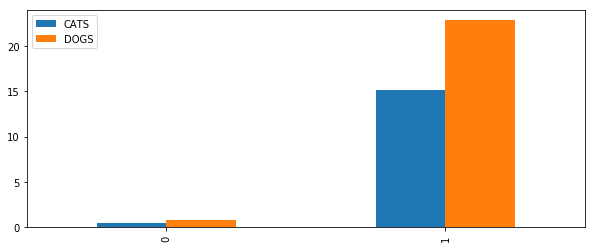

In [93]:
# okay, now for the bar graph
grouped = pd.DataFrame(columns = ['CATS', 'DOGS'])
grouped.set_value(0, 'CATS', cat_fav)
grouped.set_value(1, 'CATS', cat_rt)
grouped.set_value(0, 'DOGS', dog_fav)
grouped.set_value(1, 'DOGS', dog_rt)

grouped.plot.bar(figsize=(10,4))
plt.show()

### So in both cases, cats seem to be less in favor than dogs. Dog posts are both liked and retweeted more frequently on average than cat posts on Twitter. 

### Let's look at location and find the most popular place for cat posts vs. dog posts

In [97]:
#Get rid of none values for the timezone
timecat_df = tcat_df[tcat_df.userTimezone.notnull()]
pop_cat = timecat_df.groupby('userLocation')[['tweetRetweetCt', 'tweetFavoriteCt']].mean()
pop_cat

timedog_df = tdog_df[tdog_df.userTimezone.notnull()]
pop_dog = timedog_df.groupby('userLocation')[['tweetRetweetCt', 'tweetFavoriteCt']].mean()
pop_dog

,tweetRetweetCt,tweetFavoriteCt
userLocation,,
,23.754630,0.597222
America,0.000000,0.000000
PENNSYLVANIA,14.818182,0.000000
U.S.A.,11.000000,0.000000
#Cats #Birds #Owls #Nature #Photos #Mindfulness #HarryPotter #Angels #Medicine #Mental Health #Quotes #Dance #Positivity #Kindness #Motivation,3.000000,0.000000
#RAPPSQ,2.000000,0.000000
'Burb of Cols OH,1.000000,0.000000
(In Vancouver),2.000000,1.000000
...,40.000000,0.000000


,tweetRetweetCt,tweetFavoriteCt
userLocation,,
,22.390593,0.52454
Oregon Coast,26.000000,0.00000
"Mesa, AZ",48.000000,0.00000
Arizona,3.000000,0.00000
Australia,1.000000,0.00000
Great Britain,0.000000,2.00000
Greater Orlando Area.,114.000000,0.00000
In some place,2.000000,0.00000
Phoenix Arizona,7.000000,0.00000


#### Okay, this turned out odd. I'll revisit it with a new set of eyes later. 